# ANALISE DE ATENDIMENTOS POR CHAT

### Introdução
Este projeto tem como objetivo analisar o atendimento ao cliente por meio de chats, identificando padrões de comportamento, eficiência e áreas de melhoria com foco em elevar o NPS. A análise foi realizada utilizando dados extraídos de arquivos JSON contendo informações sobre a duração dos chats, quantidade de mensagens trocadas e avaliações dos atendimentos.

#### Objetivos
 1. Identificar Padrões de Volume de Chats:

 Analisar o volume de chats por dia da semana e hora do dia para otimizar a alocação de recursos e melhorar a eficiência do atendimento.

 2. Avaliar a Duração dos Chats:

 Calcular a média e o desvio padrão da duração dos chats para entender a variabilidade e identificar possíveis gargalos no atendimento.

 3. Analisar Avaliações dos Atendimentos (NPS):

 Avaliar as classificações dos atendimentos para entender a satisfação do cliente e identificar áreas de melhoria.

## Metodologia
A metodologia adotada envolveu a extração de dados de arquivos JSON, processamento e análise dos dados utilizando bibliotecas como pandas e NumPy, e visualização dos resultados com Seaborn e Matplotlib. Foram gerados gráficos para visualizar o volume de chats, a duração dos atendimentos e a distribuição das avaliações.

In [6]:
# Importação das bibliotecas que serão utilizadas para a análise

import pandas as pd
import numpy as np
import seaborn as sns
import json 
import requests
import matplotlib.pyplot as plt
import os
from datetime import datetime

sns.set_style("whitegrid")

%matplotlib inline

In [7]:
caminho_diretorio = 'C:/Users/Rai/Projeto/Analise de Chats/dados/Armazem de Chats/'
caminho_chamados_abertos = 'C:/Users/Rai/Projeto/Analise de Chats/Dados/Chamados.xlsx'

In [8]:
listagem_arquivos = os.listdir(caminho_diretorio)
df_chamados_abertos = pd.read_excel(caminho_chamados_abertos)

#  NPS dos Atendimentos Chat:

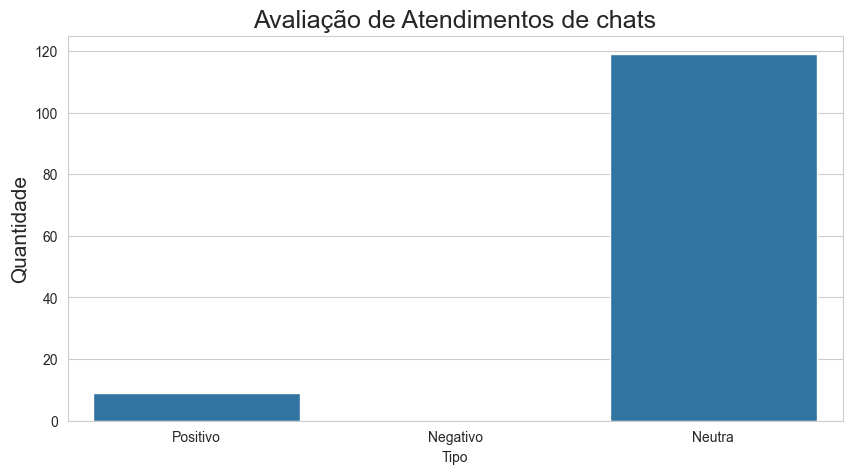

In [30]:
# Iniciação das variaveis e litas
count = 0
lista = []
lista_datas = np.array(lista)
lista_avaliacao = np.array(lista)

negativa = 0 
positiva = 0
neutra = 0

while count < len(listagem_arquivos):
    filename = listagem_arquivos[count]
    count += 1

    with open((caminho_diretorio + filename), encoding='utf8') as json_file:
        conteudo_json = json.load(json_file)

        data = conteudo_json['createdOn']
        lista_datas = np.append(lista_datas, data)

count = 0
count_filtrados = 0

while count < len(listagem_arquivos):
    filename = listagem_arquivos[count]

    with open((caminho_diretorio + filename), encoding='utf8') as json_file:
        conteudo_json = json.load(json_file)

        inicio = '2019-12-02'
        fim = '2019-12-06'

        

        # Verifica se a data do chat está dentro do intervalo
        if lista_datas[count] >= inicio and lista_datas[count] <= fim:
            avaliacao = conteudo_json['rating']

            if avaliacao == -1:
                negativa += 1
            elif avaliacao == 1:
                positiva += 1
            else: 
                neutra += 1

            lista_avaliacao = np.append(lista_avaliacao, avaliacao)
            count_filtrados += 1
    count += 1
    
# Criar um dicionário com os dados das avaliações
dados = {'Quantidades': [positiva, negativa, neutra],
         'Tipo': ['Positivo','Negativo','Neutra']}

df_avaliacao_clientes = pd.DataFrame(data=dados)

plt.figure(figsize=(10, 5))
sns.barplot(x='Tipo', y='Quantidades', data=df_avaliacao_clientes)
plt.title('Avaliação de Atendimentos de chats',fontsize=18)
plt.ylabel('Quantidade', fontsize=15)
plt.savefig('C:/Users/Rai/Projeto/Analise de Chats/Imagens/Avaliaação de Atendimentos.png');


### Análise NPS:

Avaliação em sua grande parte é "Neutra" conforme o grafico, isso demonstra que nao há sentimentos fortes por parte dos clientes em relação ao atendimento, havendo oportunidades de  melhorias. Como por exemplo, treinamento com o time para focar na resolução de problemas e encatamento do cliente.

## Captura de duração, quantidade de mensagens e data dos chats com filtro do periodo.

 Aqui será criada as variaveis e listas que receberão os codigos para trabalharmos ao longo do projeto.

In [9]:
# criando as listas e variaveis:
count  = 0
duracao = 0
quantidade_de_mensagens = 0

lista = []
lista_duracao = np.array(lista)
lista_quantidade_de_mensagens = np.array(lista)
lista_datas = np.array(lista)


# Aqui será feita a filtragem,  extração dos dados do arquivo e o armazenamento nas variaveis.
while count < len(listagem_arquivos):
    filename = listagem_arquivos[count]
    count += 1

    with open((caminho_diretorio + filename), encoding='utf8') as json_file:
        conteudo_json = json.load(json_file)
    data = conteudo_json['createdOn']
    lista_datas = np.append(lista_datas, data)

count = 0
count_filtrados = 0

while count < len(listagem_arquivos):
    
    filename = listagem_arquivos[count]

    with open((caminho_diretorio + filename), encoding='utf8') as json_file:
        conteudo_json = json.load(json_file)

        inicio = '2019-11-01'
        fim = '2019-12-31'

        if lista_datas[count] >= inicio and lista_datas[count] <= fim:
            
            duracao = conteudo_json['chatDuration']
            duracao = duracao/60
            duracao = int(duracao)

            lista_duracao = np.append(lista_duracao, duracao)
            quantidade_de_mensagens = conteudo_json['messageCount']
            lista_quantidade_de_mensagens = np.append(lista_quantidade_de_mensagens, quantidade_de_mensagens)

            count_filtrados += 1
    count += 1
        

In [10]:
# Agora que fizemos a extração dos dados utilizando as bibliotecas Json para extrair os dados do arquivo e Numpy para armazenar os dados:

dados = {'Duração por Minutos': lista_duracao,
         'Quantidade de Mensagens': lista_quantidade_de_mensagens}


In [12]:
# Tabela com dados do chat com duração e quantidade de mensagens.
df = pd.DataFrame({
    'Duração Por Minutos': lista_duracao,
    'Quantidade de Mensagens': lista_quantidade_de_mensagens
})

df = df[df['Duração Por Minutos'] > 0.0]


In [13]:

styled_df = df.head(5).style \
    .set_table_styles(
        [{'selector': 'thead th', 'props': [('background-color', '#ADD8E6')]}]
    ).set_properties(**{'border': '1px solid black'}) \
    .format({'Duração Por Minutos': '{:.1f}', 'Quantidade de Mensagens': '{:.2f}'})


styled_df

,Duração Por Minutos,Quantidade de Mensagens
0,11.0,35.00
1,85.0,28.00
2,22.0,13.00
3,15.0,18.00
4,56.0,44.00


## Regressão Linear

O gráfico de regressão linear permite visualizar como a duração dos chats se relaciona com a quantidade de mensagens trocadas. Ele ajuda a identificar se há uma correlação entre essas duas variáveis e entender melhor o comportamento das interações no chat.
 

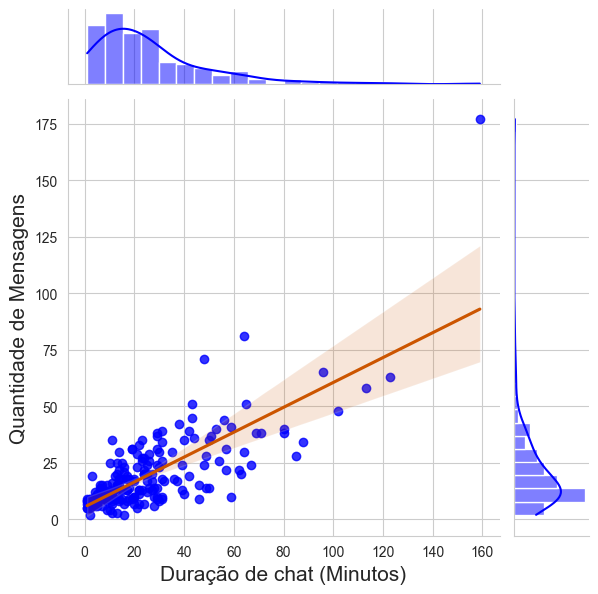

In [14]:
# Usando biblioteca seaborn para gerar graficos estatisticos:
sns.jointplot(x='Duração Por Minutos', y='Quantidade de Mensagens', data=df,kind='reg', color='blue',
line_kws={'color': '#CC5500'})
sns.despine()
plt.xlabel('Duração de chat (Minutos)', fontsize=15)
plt.ylabel('Quantidade de Mensagens', fontsize=15)
plt.savefig('C:/Users/Rai/Projeto/Analise de Chats/Imagens/Regressão Linear .png');

## Análise: 
 O gráfico de dispersão demonstra que há um volume maior de interações do cliente nos primeiros minutos de conversa. Isso indica que os usuários têm mais dúvidas e preocupações no começo, e à medida que a conversa avança, as dúvidas podem ser sanadas e a quantidade de mensagens diminui. Abaixo conseguimos ver um pouco mais de perto como acontecem as interações.

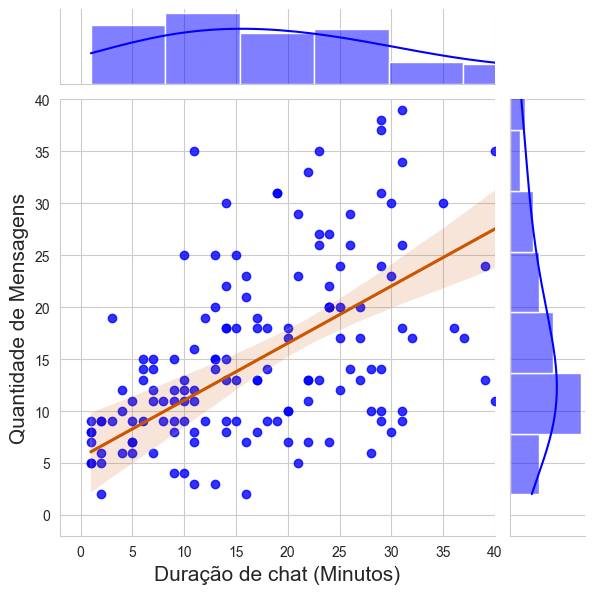

In [98]:
sns.jointplot(x='Duração Por Minutos', y='Quantidade de Mensagens', data=df,kind='reg', xlim=[-2, 40], ylim=[-2, 40], color='blue',
line_kws={'color': '#CC5500'})
sns.despine()
plt.xlabel('Duração de chat (Minutos)', fontsize=15)
plt.ylabel('Quantidade de Mensagens', fontsize=15)
plt.savefig('C:/Users/Rai/Projeto/Analise de Chats/Imagens/Regressão Linear Zoom.png');

## Histograma de duração e quantidade de mensagens do chat

Média de Duração do chat: 27 minutos
Desvio padrão de duração de chat: 24



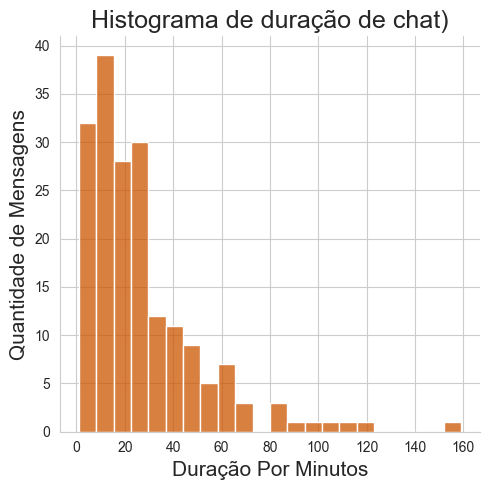

In [142]:
# Calculo de média e desvio padrão com pandas
media = df['Duração Por Minutos'].mean()
media = int(media)
print(f'Média de Duração do chat: {media} minutos')

desvio_padrao = df['Duração Por Minutos'].std()
desvio_padrao = int(desvio_padrao )
print('Desvio padrão de duração de chat: {desvio_padrao}\n'.format(desvio_padrao=desvio_padrao ))

#gerando o grafico
plt.figure(figsize=(5, 5))
sns.histplot(df['Duração Por Minutos'], color='#CC5500', kde=False)

sns.despine()
plt.title('Histograma de duração de chat)', fontsize=18)
plt.xlabel('Duração Por Minutos', fontsize=15)
plt.ylabel('Quantidade de Mensagens', fontsize=15)
plt.tight_layout()
plt.show()
      

## Análise:

Média de Duração do Chat:

A média de duração dos chats é de 27 minutos. Isso indica que, em média, cada sessão de chat dura cerca de meia hora.

Desvio Padrão:

O desvio padrão da duração dos chats é de 24 minutos. Isso mostra uma grande variabilidade na duração dos chats, sugerindo que alguns chats são muito curtos enquanto outros são significativamente mais longos.

##  Volume de chats na semana


In [85]:
# Inicializando as variáveis e listas
count = 0
dia1 = 0
dia2 = 0
dia3 = 0
dia4 = 0
dia5 = 0

lista = [] 
lista_datas = np.array(lista)

while count < len(listagem_arquivos):
    filename = listagem_arquivos[count]
    count += 1

    with open((caminho_diretorio + filename), encoding='utf8') as json_file:
        conteudo_json = json.load(json_file)

    data = conteudo_json['createdOn']

    # Formatando a data para o formato desejado substituindo caracteres com repleace    
    data = data.replace('T', ' ')
    data = data.replace('Z', '')
    data = data[:19]
    data = datetime.strptime(data, '%Y-%m-%d %H:%M:%S')

    data_inicio1 = '2019-12-02 00:00:00'
    data_inicio2 = '2019-12-03 00:00:00'
    data_inicio3 = '2019-12-04 00:00:00'
    data_inicio4 = '2019-12-05 00:00:00'
    data_inicio5 = '2019-12-06 00:00:00'

    data_fim1 = '2019-12-02 23:59:59'
    data_fim2 = '2019-12-03 23:59:59'
    data_fim3 = '2019-12-04 23:59:59'
    data_fim4 = '2019-12-05 23:59:59'
    data_fim5 = '2019-12-06 23:59:59'

    #contando numero de chats em cada dia da semana
    if data >= datetime.strptime(data_inicio1, '%Y-%m-%d %H:%M:%S') and data <= datetime.strptime(data_fim1, '%Y-%m-%d %H:%M:%S'):
        dia1 += 1
    elif data >= datetime.strptime(data_inicio2, '%Y-%m-%d %H:%M:%S') and data <= datetime.strptime(data_fim2, '%Y-%m-%d %H:%M:%S'):
        dia2 += 1
    elif data >= datetime.strptime(data_inicio3, '%Y-%m-%d %H:%M:%S') and data <= datetime.strptime(data_fim3, '%Y-%m-%d %H:%M:%S'):
        dia3 += 1
    elif data >= datetime.strptime(data_inicio4, '%Y-%m-%d %H:%M:%S') and data <= datetime.strptime(data_fim4, '%Y-%m-%d %H:%M:%S'):
        dia4 += 1
    elif data >= datetime.strptime(data_inicio5, '%Y-%m-%d %H:%M:%S') and data <= datetime.strptime(data_fim5, '%Y-%m-%d %H:%M:%S'):
        dia5 += 1

    lista_datas = np.append(lista_datas, data)

volume_conversa = {'Volume de chats': [dia1, dia2, dia3, dia4, dia5],
                   'Dias da semana': ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta']}
df_conversa = pd.DataFrame(volume_conversa)
df_conversa

,Volume de chats,Dias da semana
0,52,Segunda
1,27,Terça
2,21,Quarta
3,28,Quinta
4,35,Sexta


### Grafico para visualizar a dinamica detalhada do volume de chats:

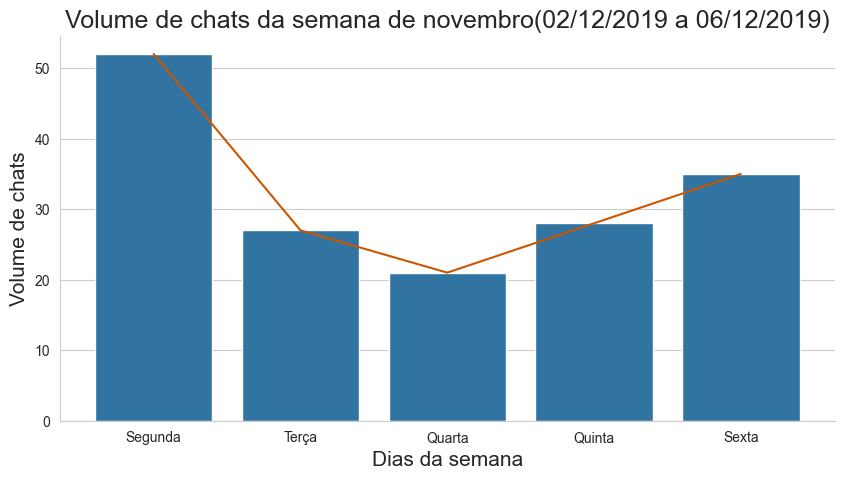

In [103]:
data_inicio1 = data_inicio1[:10]
data_fim5 = data_fim5[:10]

inicio = data_inicio1[8:] + '/' + data_inicio1[5:7] + '/' + data_inicio1[0:4]
fim = data_fim5[8:] + '/' + data_fim5[5:7] + '/' + data_inicio1[0:4]
data = inicio + ' a ' + fim

plt.figure(figsize=(10, 5))
plt.title('Volume de chats da semana de novembro({data})'.format(data=data), fontsize=18)
sns.barplot(x='Dias da semana', y='Volume de chats', data=df_conversa)
plt.plot(df_conversa['Volume de chats'], color='#CC5500')

sns.despine()
plt.xlabel("Dias da semana", fontsize=15)
plt.ylabel("Volume de chats", fontsize=15)
plt.savefig('C:/Users/Rai/Projeto/Analise de Chats/Imagens/Volume de chats.png');

## Análise volume de chats por dia na semana:

 #### Padrões de Volume de Chats:
 
Segunda-feira: O volume de chats é maior nas segundas-feiras. Isso pode indicar um acúmulo de questões e problemas durante o final de semana. 

Dias Intermediários: O volume de chats tende a ser mais estável e moderado durante os dias de terça, quarta e quinta-feira .

Sexta-feira: Há uma leve queda no volume de chats nas sextas-feiras, possivelmente indicando uma redução na atividade à medida que o final de semana se aproe os picosde espera.
 

 #### Alocação de Recursos:
 Dia de Maior Demanda: Dado o volume maior de demandas nas segundas-feiras, é interessante alocar mais recursos e equipe de atendimento para resolver as demandas que ficaram pendentes do final de semana.

 Ajustar as Escalas: Ajustar escalas para garantir que haja suporte durante os picos pode melhorar a eficiencia do atendimento, reduzindo tempo de espera.

## Linha de controle por volume de horário
Monitoramento do volume de chats

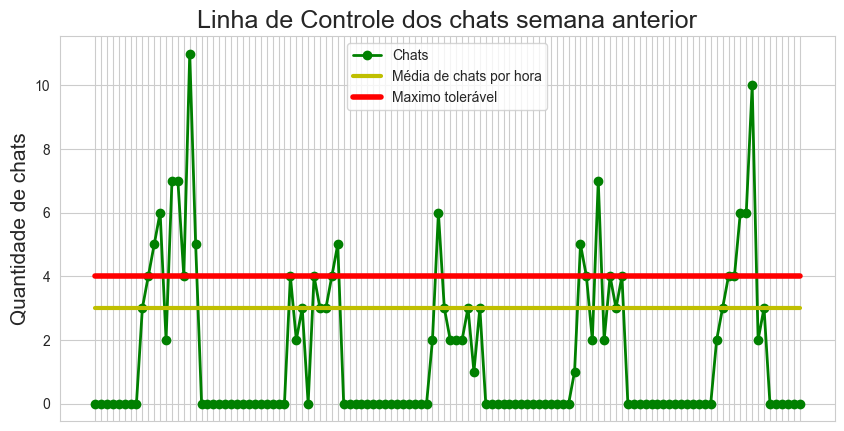

In [117]:
maximo = 4
volume_conversas_horas = pd.read_csv('C:/Users/Rai/Projeto/Analise de Chats/Dados/Volume_Chat.csv')
volume_conversas_horas_filtrado = volume_conversas_horas[volume_conversas_horas['Volume de Conversas'] > 0]

media_volume_conversas = volume_conversas_horas_filtrado['Volume de Conversas'].mean()
media_volume_conversa = int(media_volume_conversas)

y = volume_conversas_horas['Volume de Conversas']
y = list(y)

valor = volume_conversas_horas['Volume de Conversas'].count()
valor = int(valor)

lista_media = []
lista_maximo = []

for dado in range(valor):
    lista_media.append(media_volume_conversa)
    lista_maximo.append(maximo)

plt.figure(figsize=(10, 5))

x = list(range(valor))
plt.xticks(x, [])

plt.plot(y, 'g-', lw=2, marker='o', markersize=6)
plt.title('Linha de Controle dos chats semana anterior', fontsize=18)
plt.ylabel('Quantidade de chats', fontsize=15)
plt.plot(lista_media, color='y', lw=3)
plt.plot(lista_maximo, color='r', lw=4)
plt.legend(['Chats', 'Média de chats por hora', 'Maximo tolerável'])
plt.savefig('C:/Users/Rai/Projeto/Analise de Chats/Imagens/Linha de Controle.png')


### Análise da Linha de Controle dos Chats:

 ##### Linha Verde:
 Representa a quantidade de chats por hora ao longo da semana anterior. 
Ajuda a visualizar diretamente a variabilidade do volume de chats e identificar picos de demanda
 ##### Linha Amarela (Média chats por hora):.
Indica a média de chats por hora, servindo como ponto de referência. 
Identifica quando o volume está acima ou abaixo do esperado, ajudando a monitorar a consistência do volume de chato.
 




  ##### Linha vermelha (maximo Tolerável):
 Representa o volume máximo de chats aceitável. Valores acima dessa linha sugerem sobrecarregamento.
 Impacta negativamente a experiência do cliente, aumentando o tempo de espera e prejudicando a qualidade do atendimento.

### Insights para possíveis soluções:
 Automatização: Implementar chatbots para lidar com perguntas frequentes e redirecionar casos mais complexos aos atendentes humanos, reduzindo a carga de trabalho e o tempo de resposta.
 

Treinamento contínuo: Realizar treinamentos regulares focados em habilidades de resolução rápida de problemas e eficiência no atendimento.

## Motivo dos chamados abertos
 Aqui trago alguns chamados abertos pelos clientes para avaliação:

<Figure size 1000x600 with 0 Axes>

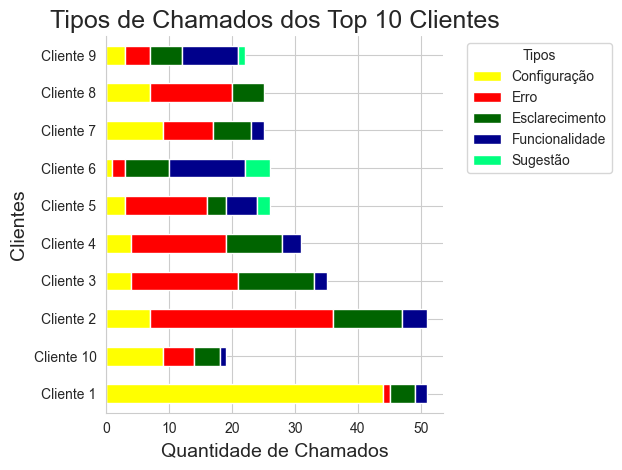

In [26]:
#Imporando arquivo
caminho_chamados_abertos = 'C:/Users/Rai/Projeto/Analise de Chats/Dados/Chamados.xlsx'
df_chamados_abertos = pd.read_excel(caminho_chamados_abertos)


# Filtra os dados para os top 10 clientes
top10_clientes = df_chamados_abertos['Cliente'].value_counts().head(10).index
df_top10_clientes = df_chamados_abertos[df_chamados_abertos['Cliente'].isin(top10_clientes)].copy()

# Cria um dicionário para mapear os novos nomes dos clientes
cliente_mapping = {cliente: f'Cliente {i+1}' for i, cliente in enumerate(top10_clientes)}
df_top10_clientes.loc[:, 'Cliente'] = df_top10_clientes['Cliente'].map(cliente_mapping)

# Conta os tipos de chamados por cliente
cliente_tipo_counts = df_top10_clientes.groupby(['Cliente', 'Tipo']).size().unstack(fill_value=0)

# Definir cores específicas para os tipos de chamados
cores = {
    'Configuração': '#FFFF00',  # Amarelo
    'Erro': '#FF0000',  # Vermelho
    'Esclarecimento': '#006400',  # Verde Escuro
    'Funcionalidade': '#00008B',  # Azul Escuro
    'Sugestão': '#00FF7F'  # Verde Claro
}

# Aplica as cores na ordem dos tipos de chamados
color_list = [cores[tipo] for tipo in cliente_tipo_counts.columns]

# Plota os tipos de chamados por cliente
plt.figure(figsize=(10, 6))
cliente_tipo_counts.plot(kind='barh', stacked=True, color=color_list)
sns.despine()
plt.title('Tipos de Chamados dos Top 10 Clientes', fontsize=18)
plt.xlabel('Quantidade de Chamados', fontsize=14)
plt.ylabel('Clientes', fontsize=14)
plt.legend(title='Tipos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show();



### Análise dos Chamados:
Analisando o gráfico, notamos que os maiores acionamentos de chamados por parte dos clientes estão relacionados a configuração, erro, e esclarecimento. Isso nos traz algumas reflexões:


 Um número elevado de chamados para configurações indica que os clientes podem estar enfrentando dificuldades para configurar produtos. Isso sugere a necessidade de melhorar a documentação e oferecer tutoriais mais detalhados.


## Estratégia para Melhoria do NPS e Ganho de Eficiência no Atendimento
Após analisar os dados de chats e chamados abertos, identificamos várias oportunidades para aprimorar o atendimento ao cliente. Aqui estão as estratégias sugeridas: 

#### 
Treinamento da Equipe:
 
Resolução de Problemas: Focar no treinamento da equipe para resolver problemas de forma eficiente e rápida, reduzindo o tempo de atendimento e aumentando a satisfação do cliente.
 
Encantamento do Cliente: Incluir técnicas de encantamento, como empatia, proatividade, e personalização no atendimento.
#### 
Automatização e Eficiência:
 
Uso de Chatbots: Implementar chatbots para lidar com perguntas frequentes, liberando os atendentes para focar em casos mais complexos e proporcionando uma resposta mais rápida aos clientes.
 FFerramentas de Suporte: Equipar a equipe com ferramentas de suporte avançadas para melhorar a eficiência e a qualidade do atendimento.
#### 
Monitoramento e Feedback:
 
Monitoramento Contínuo: Implementar sistemas de monitoramento em tempo real para avaliar a performance do atendimento e identificar áreas de melhoria.
 
Coleta de Feedback: Coletar feedback detalhado dos clientes após os atendimentos para identificar pontos fracos e ajustar estratégias conforme necessário.